In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [3]:
# Model was adapted from Anderson et al. (2015) - Computational modeling of cytokine signaling in microglia

In [4]:
### Parameters ###

def ODE_parameters():

    p = np.zeros(94)
    
    # IL1b
    p[0] = 1        # activation rate constant, IL-1b
    p[1] = 3        # K, LPS -> IL1b; Lee et al., 1993
    p[2] = 1        # delay, LPS -> IL1b
    p[3] = 1        # K, IL1b -> IL1b Estimation
    p[4] = 1        # nH, IL1b -> IL1b
    p[5] = 1        # delay, IL1b -> IL1b
    p[6] = 3.16     # K, TNFa -> IL1b Estimation
    p[7] = 1        # nH, TNFa -> IL1b
    p[8] = 5        # delay, TNFa -> IL1b
    p[9] = 5        # K, IL6 --| IL1b; Minogue et al., 2012
    p[10] = 1       # nH, IL6 --| IL1b
    p[11] = 1       # delay, IL6 --| IL1b
    p[12] = 20      # K, IL10 --| IL1b
    p[13] = 1       # nH, IL10 --| IL1b
    p[14] = 1       # delay, IL10 --| IL1b
    p[15] = 900     # K, CCL5 --| IL1b; Gamo et al., 2008
    p[16] = 1       # nH, CCL5 --| IL1b
    p[17] = 1       # delay, CCL5 --| IL1b
    p[18] = 0.01    # passive degradation, IL-1b

    # TNFa
    p[19] = 900     # activation rate constant, TNFa
    p[20] = 29      # K, LPS -> TNFa; Chao et al., 1992
    p[21] = 1       # delay, LPS -> TNFa
    p[22] = 1.61    # K, IL1b -> TNFa; Chao et al., 1995a
    p[23] = 1       # nH, IL1b -> TNFa
    p[24] = 1       # delay, IL1b -> TNFa
    p[25] = 0.05    # K, TNFa -> TNFa; Kuno et al., 2005
    p[26] = 1       # nH, TNFa -> TNFa
    p[27] = 1       # delay, TNFa -> TNFa
    p[28] = 35.7    # K, IL6 --| TNFa; Chao et al., 1995a
    p[29] = 1       # nH, IL6 --| TNFa
    p[30] = 1       # delay, IL6 --| TNFa
    p[31] = 0.05    # K, TGFb --| TNFa; Chao et al., 1995a,b
    p[32] = 1       # nH, TGFb --| TNFa
    p[33] = 1       # delay, TGFb --| TNFa
    p[34] = 0.011   # K, IL10 --| TNFa; Chao et al., 1995a
    p[35] = 1       # nH, IL10 --| TNFa
    p[36] = 1       # delay, IL10 --| TNFa
    p[37] = 973     # K, CCL5 --| TNFa; Gamo et al., 2008
    p[38] = 1       # nH, CCL5 --| TNFa
    p[39] = 1       # delay, CCL5 --| TNFa
    p[40] = 0.1     # passive degradation, TNFa

    # IL6
    p[41] = 0.4     # activation rate constant, IL6
    p[42] = 100     # K, LPS -> IL6; Chao et al., 1992
    p[43] = 1       # delay, LPS -> IL6
    p[44] = 5       # K, TNFa -> IL6; Minogue et al., 2012
    p[45] = 1       # nH, TNFa -> IL6
    p[46] = 1       # delay, TNFa -> IL6
    p[47] = 20      # K, IL10 --| IL6
    p[48] = 1       # nH, IL10 --| IL6
    p[49] = 1       # delay, IL10 --| IL6
    p[50] = 100     # K, CCL5 --| IL6; Gamo et al., 2008
    p[51] = 1       # nH, CCL5 --| IL6
    p[52] = 1       # delay, CCL5 --| IL6
    p[53] = 0.01    # passive degradation, IL6

    # TGFb
    p[54] = 40      # activation rate constant, TGFb
    p[55] = 55      # K, TNFa -> TGFb; Chao et al., 1995
    p[56] = 1       # nH, TNFa -> TGFb
    p[57] = 1       # delay, TNFa -> TGFb
    p[58] = 15      # K, TGFb -> TGFbproposed
    p[59] = 1       # nH, TGFb -> TGFb
    p[60] = 1       # delay, TGFb -> TGFb
    p[61] = 0.01    # passive degradation, TGFb

    # IL10
    p[62] = 10      # activation rate constant, IL10
    p[63] = 100     # K, LPS -> IL10; Sheng et al., 1995
    p[64] = 1       # delay, LPS -> IL10
    p[65] = 22.2    # K, TNFa -> IL10; Sheng et al., 1995
    p[66] = 0.5     # nH, TNFa -> IL10
    p[67] = 1       # delay, TNFa -> IL10
    p[68] = 20      # K, IL6 -> IL10; Sheng et al., 1995
    p[69] = 1       # nH, IL6 -> IL10
    p[70] = 1       # delay, IL6 -> IL10
    p[71] = 30      # K, CCL5 --| IL10; Skuljek et al., 2011
    p[72] = 1       # nH, CCL5 --| IL10
    p[73] = 1       # delay, CCL5 --| IL10
    p[74] = 0.01    # passive degradation, IL10

    # CCL5
    p[75] = 3       # activation rate constant, CCL5
    p[76] = 5       # K, LPS -> CCL5; Hu et al., 1999
    p[77] = 1       # delay, LPS -> CCL5
    p[78] = 1       # K, IL1b -> CCL5; Hu et al., 1999
    p[79] = 1       # nH, IL1b -> CCL5
    p[80] = 1       # delay, IL1b -> CCL5
    p[81] = 2       # K, TNFa -> CCL5; Hu et al., 1999
    p[82] = 2       # nH, TNFa -> CCL5
    p[83] = 1       # delay, TNFa -> CCL5
    p[84] = 3       # K, IL6 -> CCL5; Hu et al., 1999
    p[85] = 1       # nH, IL6 -> CCL5
    p[86] = 1       # delay, IL6 -> CCL5
    p[87] = 1       # K, TGFb --| CCL5; Hu et al., 1999
    p[88] = 2       # nH, TGFb --| CCL5
    p[89] = 1       # delay, TGFb --| CCL5
    p[90] = 30      # K, IL10 --| CCL5; Hu et al., 1999
    p[91] = 1       # nH, IL10 --| CCL5
    p[92] = 1       # delay, IL10 --| CCL5
    p[93] = 0.001   # passive degradation, CCL5
    
    return p



In [9]:
### Introduce external inhibitors
## Equations ##

def ODE_equations(x, t, p, LPSstim, ExInhib):
    '''
    Note: Many of the variables in the equations are rased to a power. This was introduced in the initial model of 
    Anderson, but was not used. It is kept here in order to maintain the same modeling framework, but as in 
    the anlysis of Anderson, here too it is not used.
    
    ExInhib: vector of inhibitor strength, one for each of the cytokines. 
             Takes values 0-1, 0 is the strongest inhibition, 1 is no effect.
    
    '''
    
    global ssdeg
    global h #counter
#     global Vil10
    h = h + 1

    # LPS stimulus
#     print(t)
    if t > 0:
        LPS = LPSstim
    else:
        LPS = 0

    # cytokine expression rates
    v0_a = p[0]                                                 # activation rate,  IL-1b
    v0_2 = LPS / (LPS + p[1])                                   # LPS activates IL-1b
    v0_3 = (x[0] ** p[4]) / (x[0] ** p[4] + p[3] ** p[4])       # IL-1b activates IL-1b
    v0_4 = (x[1] ** p[7]) / (x[1] ** p[7] + p[6] ** p[7])       # TNFa activates IL-1b
    v0_5 = (p[9] ** p[10]) / (x[2] ** p[10] + p[9] ** p[10])    # IL-6 inhibits IL-1b
    v0_6 = (p[12] ** p[13]) / (x[4] ** p[13] + p[12] ** p[13])  # IL-10 inhibits IL-1b
    v0_7 = (p[15] ** p[16]) / (x[5] ** p[16] + p[15] ** p[16])  # CCL5 inhibits IL-1b
    v0_d = p[18] * x[0]                                         # passive degradation of IL-1b

    v1_a = p[19]                                                # activation rate,  TNFa
    v1_2 = LPS / (LPS + p[20])                                  # LPS activates TNFa
    v1_3 = (x[0] ** p[23]) / (x[0] ** p[23] + p[22] ** p[23])   # IL-1b activates TNFa
    v1_4 = (x[1] ** p[26]) / (x[1] ** p[26] + p[25] ** p[26])   # TNFa activates TNFa
    v1_5 = (p[28] ** p[29]) / (x[2] ** p[29] + p[28] ** p[29])  # IL-6 inhibits TNFa
    v1_6 = (p[31] ** p[32]) / (x[3] ** p[32] + p[31] ** p[32])  # TGFb inhibits TNFa
    v1_7 = (p[34] ** p[35]) / (x[4] ** p[35] + p[34] ** p[35])  # IL-10 inhibits TNFa
    v1_8 = (p[37] ** p[38]) / (x[5] ** p[38] + p[37] ** p[38])  # CCL5 inhibits TNFa
    v1_d = p[40] * x[1]                                         # passive degradation of TNFa

    v2_a = p[41]                                                # activation rate,  IL-6
    v2_2 = LPS / (LPS + p[42])                                  # LPS activates IL-6
    v2_3 = (x[1] ** p[45]) / (x[1] ** p[45] + p[44] ** p[45])   # TNFa activates IL-6
    v2_4 = (p[47] ** p[48]) / (x[4] ** p[48] + p[47] ** p[48])  # IL-10 inhibits IL-6
    v2_5 = (p[50] ** p[51]) / (x[5] ** p[51] + p[50] ** p[51])  # CCL5 inhibits IL-6
    v2_d = p[53] * x[2]                                         # passive degradation of IL-6

    v3_a = p[54]                                                # activation rate,  TGFb
    v3_2 = (x[1] ** p[56]) / (x[1] ** p[56] + p[55] ** p[56])   # TNFa activates TGFb
    v3_3 = (x[3] ** p[59]) / (x[3] ** p[59] + p[58] ** p[59])   # TGFb activates TGFb
    v3_d = p[61] * x[3]                                         # passive degradation of TGFb

    v4_a = p[62]                                                # activation rate,  IL-10
    v4_2 = LPS / (LPS + p[63])                                  # LPS activates IL-10
    v4_3 = (x[1] ** p[66]) / (x[1] ** p[66] + p[65] ** p[66])   # TNFa activates IL-10
    v4_4 = (x[2] ** p[69]) / (x[2] ** p[69] + p[68] ** p[69])   # IL-6 activates IL-10
    v4_5 = (p[71] ** p[72]) / (x[5] ** p[72] + p[71] ** p[72])  # CCL5 inhibits IL-10
    v4_d = p[74] * x[4]                                         # passive degradation of IL-10

    v5_a = p[75]                                                # activation rate,  CCL5
    v5_2 = LPS / (LPS + p[76])                                  # LPS activates CCL5
    v5_3 = (x[0] ** p[79]) / (x[0] ** p[79] + p[78] ** p[79])   # IL-1b activates CCL5
    v5_4 = (x[1] ** p[82]) / (x[1] ** p[82] + p[81] ** p[82])   # TNFa activates CCL5
    v5_5 = (x[2] ** p[85]) / (x[2] ** p[85] + p[84] ** p[85])   # IL-6 activates CCL5
    v5_6 = (p[87] ** p[88]) / (x[3] ** p[88] + p[87] ** p[88])  # TGFb inhibits CCL5
    v5_7 = (p[90] ** p[91]) / (x[4] ** p[91] + p[90] ** p[91])  # IL-10 inhibits CCL5
    v5_d = p[93] * x[5]                                         # passive degradation of CCL5


    # concentration-independent degradation rate constants. Initiated at first step
    if h == 1:
        ssdeg = np.zeros(6)
        ssdeg[0] = v0_a * v0_2 * v0_3 * v0_4 * v0_5 * v0_6 * v0_7 - v0_d
        ssdeg[1] = v1_a * v1_2 * v1_3 * v1_4 * v1_5 * v1_6 * v1_7 * v1_8 - v1_d
        ssdeg[2] = v2_a * v2_2 * v2_3 * v2_4 * v2_5 - v2_d
        ssdeg[3] = v3_a * v3_2 * v3_3 - v3_d
        ssdeg[4] = v4_a * v4_2 * v4_3 * v4_4 * v4_5 - v4_d
        ssdeg[5] = v5_a * v5_2 * v5_3 * v5_4 * v5_5 * v5_6 * v5_7 - v5_d

    # ODEs to compute cytokine expression
    X = np.zeros(6)
    X[0] = v0_a * v0_2 * v0_3 * v0_4 * v0_5 * v0_6 * v0_7 * ExInhib[0] - v0_d - ssdeg[0]           # IL-1b
    X[1] = v1_a * v1_2 * v1_3 * v1_4 * v1_5 * v1_6 * v1_7 * v1_8 * ExInhib[1] - v1_d - ssdeg[1]    # TNFa
    X[2] = v2_a * v2_2 * v2_3 * v2_4 * v2_5 - v2_d * ExInhib[2] - ssdeg[2]                         # IL-6
    X[3] = v3_a * v3_2 * v3_3 - v3_d * ExInhib[3] - ssdeg[3]                                       # TGFb
    X[4] = v4_a * v4_2 * v4_3 * v4_4 * v4_5 - v4_d * ExInhib[4] - ssdeg[4]                         # IL-10
    X[5] = v5_a * v5_2 * v5_3 * v5_4 * v5_5 * v5_6 * v5_7 - v5_d * ExInhib[5] - ssdeg[5]           # CCL5

    
#     print(t)
#     Vil10.append((t, v1_7))

    return X

In [10]:

def run_simulation(IC=False, LPSstim=False, ExInhib=False):
    global h
    # Setup time for this simulation -
    TSTART_PHASE = -24.0      # (hours)
    DAYS = 3
    TSTOP_PHASE = DAYS * 24.0
    NUMBER_OF_TIMESTEPS = 10*(TSTOP_PHASE - TSTART_PHASE)
    time_vector = np.linspace(TSTART_PHASE,TSTOP_PHASE,NUMBER_OF_TIMESTEPS)

    if LPSstim == False:
        LPSstim = 1000          # LPS concentration
    if type(IC) != np.ndarray:
        IC = 0.1 * np.ones(6)
    if type(ExInhib) != np.ndarray:
        ExInhib = np.ones(6)
    p = ODE_parameters()
    h = 0       # runtime index
    XI = odeint(ODE_equations, IC, time_vector, args = (p, LPSstim, ExInhib,), rtol=1e-9, atol=1e-9)
#     print(XI)
    return time_vector, XI

In [7]:
cyto_name = [r"$IL-1\beta$", r"$TNF\alpha$", r"$IL-6$", r"$TGF\beta$", r"$IL-10$", r"$CCL5$"]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


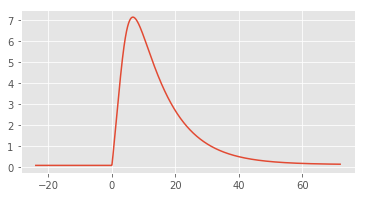

In [12]:
# First test

IC = 0.1 * np.ones(6)
# IC[i] = 10
time_vector, XI = run_simulation(IC=IC)
#     for j in range(6): # Normalization
#         XI[:, j] = XI[:, j]/max(XI[:, j])

plt.figure(figsize=(6, 3))
plt.plot(time_vector, XI[:, 1], label="High level of "+cyto_name[1])
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


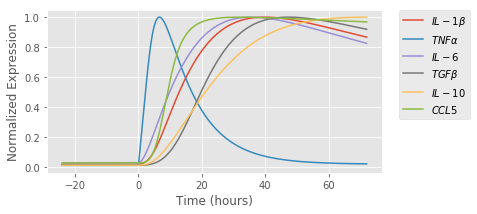

In [13]:
### Figure 5 ###
# All the cytokines

plt.figure(figsize=(6, 3))

for i in [0, 1, 2, 3, 4, 5]:
    IC = 0.1 * np.ones(6)
#     IC[i] = 10
    ExInhib = np.ones(6) #Inhibitor
    time_vector, XI = run_simulation(IC=IC, ExInhib=ExInhib)
    XI[:, i] = XI[:, i]/max(XI[:, i])
    plt.plot(time_vector, XI[:, i], label=cyto_name[i])


# plt.legend(loc=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Time (hours)")
plt.ylabel("Normalized Expression")
# plt.show()
plt.savefig("Figure4.png", dpi=1000, bbox_inches='tight')#, bbox_extra_artist=[lgd])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in double_scalars


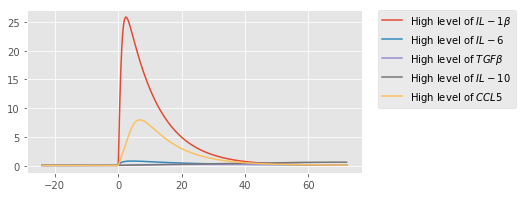

In [62]:
## Testing the reaction of TNFa to increasing the initial concentration of others

plt.figure(figsize=(6, 3))

for i in [0, 2, 3, 4, 5]:
    IC = 0.1 * np.ones(6)
    IC[i] = 10
    time_vector, XI = run_simulation(IC=IC)
#     for j in range(6): # Normalization
#         XI[:, j] = XI[:, j]/max(XI[:, j])
    plt.plot(time_vector, XI[:, 1], label="High level of "+cyto_name[i])

plt.legend(loc=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


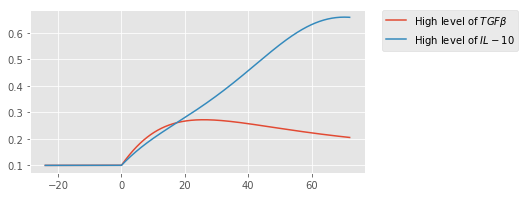

In [63]:
## Testing the reaction of TNFa to increasing the initial concentration of others - zoom in only on TGFb and IL10

plt.figure(figsize=(6, 3))

for i in [3, 4]:
    IC = 0.1 * np.ones(6)
    IC[i] = 10
    time_vector, XI = run_simulation(IC=IC)
#     for j in range(6):
#         XI[:, j] = XI[:, j]/max(XI[:, j])
    plt.plot(time_vector, XI[:, 1], label="High level of "+cyto_name[i])

# plt.legend(loc=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in double_scalars


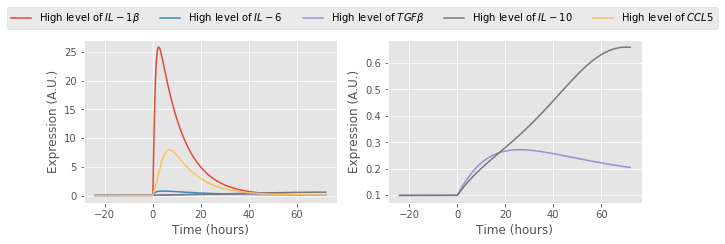

In [260]:
### Figure 6 ###
## Testing the reaction of TNFa to increasing the initial concentration of others

fig, ax = plt.subplots(1, 2, figsize=(10, 3))

for i in [0, 2, 3, 4, 5]:
    IC = 0.1 * np.ones(6)
    IC[i] = 10
    time_vector, XI = run_simulation(IC=IC)
#     for j in range(6): # Normalization
#         XI[:, j] = XI[:, j]/max(XI[:, j])
    ax[0].plot(time_vector, XI[:, 1], label="High level of "+cyto_name[i])
ax[0].set_xlabel("Time (hours)")
ax[0].set_ylabel("Expression (A.U.)")
    
colors = ["#968FD0", "#777777"]
for i in [3, 4]:
    IC = 0.1 * np.ones(6)
    IC[i] = 10
    time_vector, XI = run_simulation(IC=IC)
#     for j in range(6):
#         XI[:, j] = XI[:, j]/max(XI[:, j])
    ax[1].plot(time_vector, XI[:, 1], label="High level of "+cyto_name[i], color=colors[i-3])
ax[1].set_xlabel("Time (hours)")
ax[1].set_ylabel("Expression (A.U.)")

# ax[0].legend(bbox_to_anchor=(2.3, 1), loc=2, borderaxespad=0.)
# ax[0].legend(loc='upper center', bbox_to_anchor=(1.1, -0.3), borderaxespad=0., ncol=5)
ax[0].legend(loc='upper center', bbox_to_anchor=(1.1, 1.2), borderaxespad=0., ncol=5)
# plt.show()
plt.savefig("Figure5-1.png", dpi=1000, bbox_inches='tight')#, bbox_extra_artist=[lgd])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in double_scalars


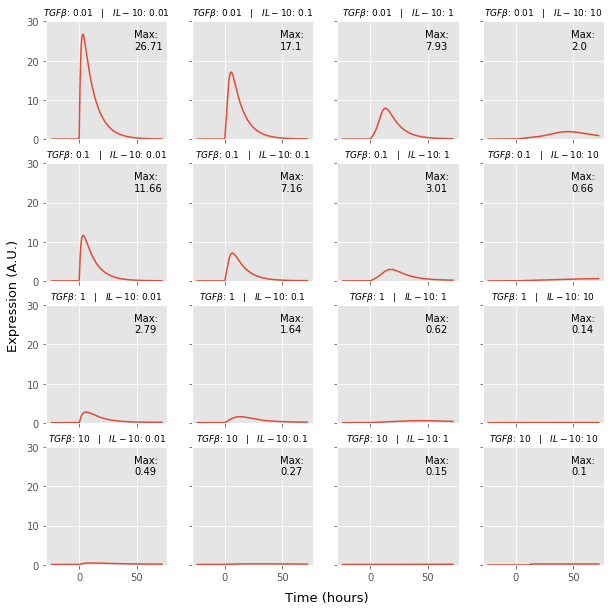

In [242]:
### Figure 7 ###
### Grid of arrays - vary initial conditions of IL-10 and TGFb

fig, ax = plt.subplots(4, 4, sharex='col', sharey='row', figsize=(10, 10))

ICvalues = [0.01, 0.1, 1, 10]

cytA = 3 #TGFb
cytB = 4 #IL10

for i in range(4):
    for j in range(4):
        IC = 0.1 * np.ones(6)
        IC[cytA] = ICvalues[i]
        IC[cytB] = ICvalues[j]
        time_vector, XI = run_simulation(IC=IC)
        ax[i, j].plot(time_vector, XI[:, 1], label=cyto_name[i])
        ax[i, j].set_title(cyto_name[cytA]+": "+str(ICvalues[i])+"   |   "+cyto_name[cytB]+": "+str(ICvalues[j]), fontsize=9)
        ax[i, j].set_ylim(0, 30)
        ax[i, j].text(48, 23, "Max:\n"+str(round(max(XI[:, 1]), 2)))
fig.text(0.515, 0.08, 'Time (hours)', ha='center', va='center', size=13)
fig.text(0.08, 0.5, 'Expression (A.U.)', ha='center', va='center', rotation='vertical', size=13)
plt.savefig("Figure6.png", dpi=1000, bbox_inches='tight')#, bbox_extra_artist=[lgd])

In [251]:
(7.24/7.16)* 3.01

3.0436312849162013

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in double_scalars


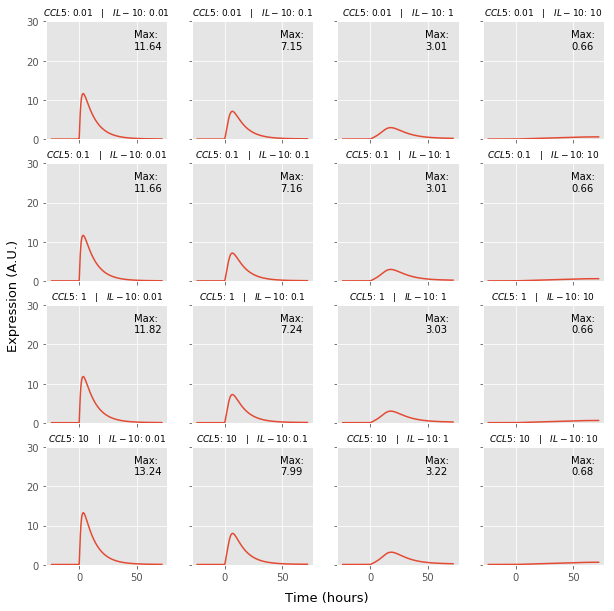

In [243]:
### Control for figure 7 - not added to the paper ###
### Grid of arrays - vary initial conditions of IL-10 and TGFb

fig, ax = plt.subplots(4, 4, sharex='col', sharey='row', figsize=(10, 10))

ICvalues = [0.01, 0.1, 1, 10]

cytA = 5 #CCL5
cytB = 4 #IL10

for i in range(4):
    for j in range(4):
        IC = 0.1 * np.ones(6)
        IC[cytA] = ICvalues[i]
        IC[cytB] = ICvalues[j]
        time_vector, XI = run_simulation(IC=IC)
        ax[i, j].plot(time_vector, XI[:, 1], label=cyto_name[i])
        ax[i, j].set_title(cyto_name[cytA]+": "+str(ICvalues[i])+"   |   "+cyto_name[cytB]+": "+str(ICvalues[j]), fontsize=9)
        ax[i, j].set_ylim(0, 30)
        ax[i, j].text(48, 23, "Max:\n"+str(round(max(XI[:, 1]), 2)))
fig.text(0.515, 0.08, 'Time (hours)', ha='center', va='center', size=13)
fig.text(0.08, 0.5, 'Expression (A.U.)', ha='center', va='center', rotation='vertical', size=13)
plt.savefig("Figure7.png", dpi=1000, bbox_inches='tight')#, bbox_extra_artist=[lgd])


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


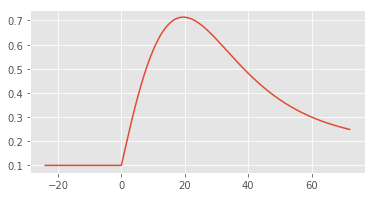

In [9]:
# Check the rates of inhibition by IL-10 on TNFa (Eq. v1_7)
Vil10 = []

plt.figure(figsize=(6, 3))
IC = 0.1 * np.ones(6)
ExInhib = np.ones(6) #Inhibitor
ExInhib[1] = 0.05
time_vector, XI = run_simulation(IC=IC, ExInhib=ExInhib)

tV = [_[0] for _ in Vil10]
vVal = [_[1] for _ in Vil10]

# vVal

plt.plot(time_vector, XI[:, 1], label="High level of "+cyto_name[i])

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


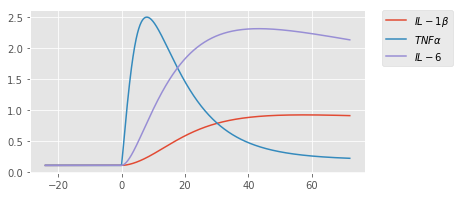

In [89]:
plt.figure(figsize=(6, 3))

for i in [0, 1, 2]:
    IC = 0.1 * np.ones(6)
#     IC[i] = 10
    ExInhib = np.ones(6) #Inhibitor
    ExInhib[1] = 0.4
    ExInhib[0] = 0.4
    time_vector, XI = run_simulation(IC=IC, ExInhib=ExInhib)
    plt.plot(time_vector, XI[:, i], label=cyto_name[i])
    
# for i in [0, 1, 2]:
#     IC = 0.1 * np.ones(6)
# #     IC[i] = 10
#     ExInhib = np.ones(6) #Inhibitor
# #     ExInhib[1] = 0.4
# #     ExInhib[0] = 0.4
#     time_vector, XI = run_simulation(IC=IC, ExInhib=ExInhib)
#     plt.plot(time_vector, XI[:, i], label=cyto_name[i]+" without inhibition", alpha=0.4)

# plt.legend(loc=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in double_scalars


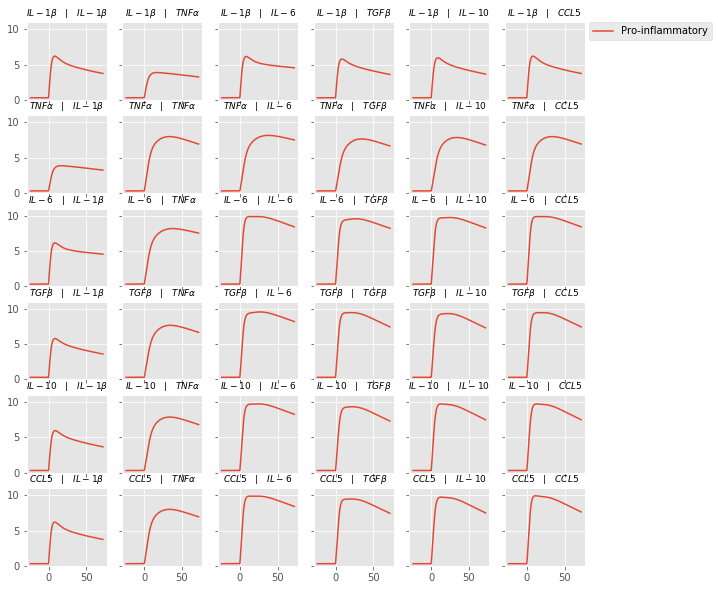

In [107]:
# Effects of combinations of inhibition agents on a joint measure of the pro-inflammatory agents (IL-1b, TNFa, & IL-6)

fig, ax = plt.subplots(6, 6, sharex='col', sharey='row', figsize=(10, 10))

IC = 0.1 * np.ones(6)
INHIB_LEVEL = 0.4

for i in range(6):
    for j in range(6):
        ExInhib = np.ones(6) #Inhibitor
        ExInhib[i] = INHIB_LEVEL
        ExInhib[j] = INHIB_LEVEL
        time_vector, XI = run_simulation(IC=IC, ExInhib=ExInhib)
        ax[i, j].plot(time_vector, XI[:, 0] + XI[:, 1] + XI[:, 2], label="Pro-inflammatory")
#         ax[i, j].plot(time_vector, XI[:, 0], label=cyto_name[0])
        ax[i, j].set_title(cyto_name[i]+"   |   "+cyto_name[j], fontsize=9)
        ax[i, j].set_ylim(0, 11)
plt.legend(bbox_to_anchor=(1.05, 7), loc=2, borderaxespad=0.)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in double_scalars


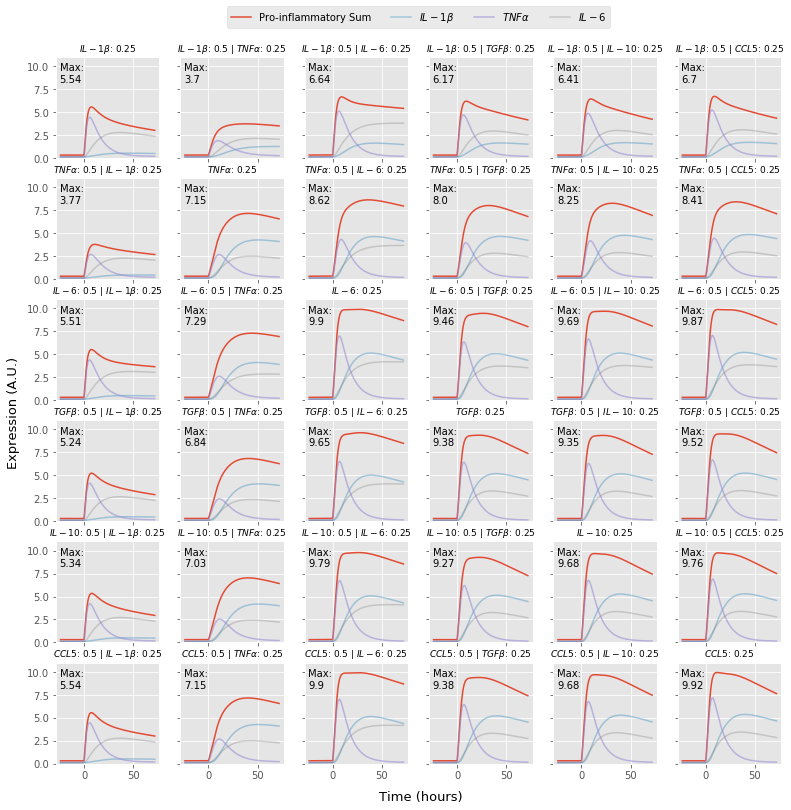

In [269]:
### Figure 8 ###
# Effects of combinations of inhibition agents on a joint measure of the pro-inflammatory agents (IL-1b, TNFa, & IL-6)

fig, ax = plt.subplots(6, 6, sharex='col', sharey='row', figsize=(13, 13))

IC = 0.1 * np.ones(6)
INHIB_LEVEL_A = 0.5
INHIB_LEVEL_B = 0.25

for i in range(6):
    for j in range(6):
        ExInhib = np.ones(6) #Inhibitor
        if i != j:
            ExInhib[i] = INHIB_LEVEL_A
            ExInhib[j] = INHIB_LEVEL_B
        else:
            ExInhib[i] = INHIB_LEVEL_B
        time_vector, XI = run_simulation(IC=IC, ExInhib=ExInhib)
        ax[i, j].plot(time_vector, XI[:, 0] + XI[:, 1] + XI[:, 2], label="Pro-inflammatory Sum")
        ax[i, j].plot(time_vector, XI[:, 0], label=cyto_name[0], alpha=0.4)
        ax[i, j].plot(time_vector, XI[:, 1], label=cyto_name[1], alpha=0.6)
        ax[i, j].plot(time_vector, XI[:, 2], label=cyto_name[2], alpha=0.3)
        ax[i, j].text(-25, 8.25, "Max:\n"+str(round(max(XI[:, 0] + XI[:, 1] + XI[:, 2]), 2)))
        if i != j:
            ax[i, j].set_title(cyto_name[i]+": "+str(INHIB_LEVEL_A)+" | "+cyto_name[j]+": "+str(INHIB_LEVEL_B), fontsize=9)
        else:
            ax[i, j].set_title(cyto_name[i]+": "+str(INHIB_LEVEL_B), fontsize=9)
        ax[i, j].set_ylim(0, 11)
# plt.legend(bbox_to_anchor=(1.05, 7), loc=2, borderaxespad=0.)

fig.text(0.515, 0.09, 'Time (hours)', ha='center', va='center', size=13)
fig.text(0.08, 0.5, 'Expression (A.U.)', ha='center', va='center', rotation='vertical', size=13)
ax[0, 0].legend(loc='upper center', bbox_to_anchor=(3.5, 1.5), borderaxespad=0., ncol=5)
plt.savefig("Figure8.png", dpi=1000, bbox_inches='tight')#, bbox_extra_artist=[lgd])


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


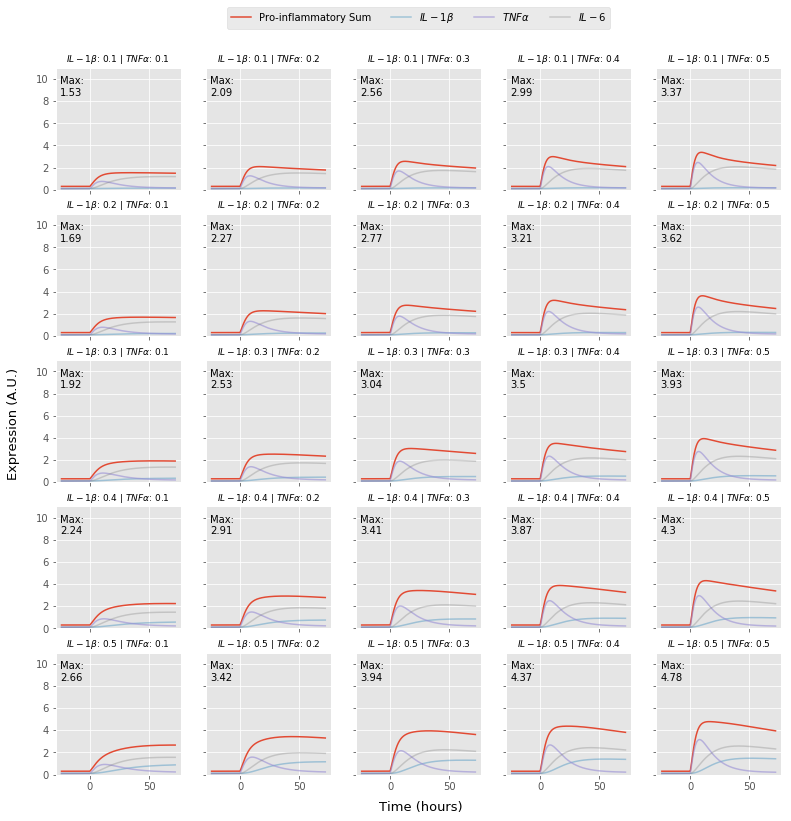

In [14]:
### Figure 9 ###
# Effects of levels of inhibition of IL-1b and TNFa on a joint measure of the pro-inflammatory agents (IL-1b, TNFa, & IL-6)


IC = 0.1 * np.ones(6)
CYTO_INHIB_A = 0
CYTO_INHIB_B = 1
INHIB_LEVELS = [0.1, 0.2, 0.3, 0.4, 0.5]
# INHIB_LEVELS = [0.0723, 0.0726, 0.0729, 0.073, 1]

fig, ax = plt.subplots(len(INHIB_LEVELS), len(INHIB_LEVELS), sharex='col', sharey='row', figsize=(13, 13))
for i in range(len(INHIB_LEVELS)):
    for j in range(len(INHIB_LEVELS)):
        ExInhib = np.ones(6) #Inhibitor
        ExInhib[CYTO_INHIB_A] = INHIB_LEVELS[i]
        ExInhib[CYTO_INHIB_B] = INHIB_LEVELS[j]
        time_vector, XI = run_simulation(IC=IC, ExInhib=ExInhib)
        ax[i, j].plot(time_vector, XI[:, 0] + XI[:, 1] + XI[:, 2], label="Pro-inflammatory Sum")
        ax[i, j].plot(time_vector, XI[:, 0], label=cyto_name[0], alpha=0.4)
        ax[i, j].plot(time_vector, XI[:, 1], label=cyto_name[1], alpha=0.6)
        ax[i, j].plot(time_vector, XI[:, 2], label=cyto_name[2], alpha=0.3)
        ax[i, j].text(-25, 8.5, "Max:\n"+str(round(max(XI[:, 0] + XI[:, 1] + XI[:, 2]), 2)))
        ax[i, j].set_title(cyto_name[CYTO_INHIB_A]+": "+str(INHIB_LEVELS[i])+" | "+cyto_name[CYTO_INHIB_B]+": "+str(INHIB_LEVELS[j]), fontsize=9)
        ax[i, j].set_ylim(0, 11)
# plt.legend(bbox_to_anchor=(1.05, 7), loc=2, borderaxespad=0.)
fig.text(0.515, 0.09, 'Time (hours)', ha='center', va='center', size=13)
fig.text(0.08, 0.5, 'Expression (A.U.)', ha='center', va='center', rotation='vertical', size=13)
ax[0, 0].legend(loc='upper center', bbox_to_anchor=(2.9, 1.5), borderaxespad=0., ncol=5)
plt.savefig("Figure9.png", dpi=1000, bbox_inches='tight')#, bbox_extra_artist=[lgd])

## Verifying Synergism

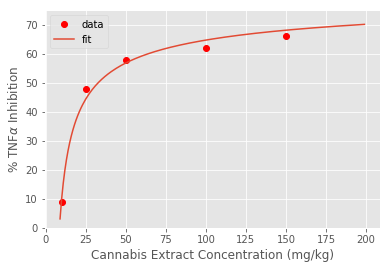

In [842]:
### Figure 11 ###
# Build a dose-response curve

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm
plt.style.use('ggplot')

xdata = np.array([10, 25, 50, 100, 150]) # concentrations
ydata = np.array([9 , 48, 58, 62, 66])/100 # inhibition percent
concentrations_theory = np.linspace(0, 200, 100)
inhibition_theory = 1 * (1 - np.exp(-1 * (concentrations_theory / 1)**1.5))

# Based on the Hill equation
def func(x, h, a, b):
    return (x**h + a) / (b + x**h)


popt, pcov = curve_fit(func, xdata, ydata)

fig, ax1 = plt.subplots(1,1)
plt.plot(xdata, ydata, 'ro', label='data')
ax1.set_yticklabels([0, 10, 20, 30, 40, 50, 60, 70])
plt.ylim(0, 0.75)
plt.plot(range(9, 200, 1), func(range(9, 200, 1), *popt), label="fit")
plt.xlabel("Cannabis Extract Concentration (mg/kg)")
plt.ylabel(r"% TNF$\alpha$ Inhibition")
plt.legend()
# plt.xscale("log")
# plt.show()
plt.savefig("Dose-response.png", dpi=1000, bbox_inches='tight')#, bbox_extra_artist=[lgd])

In [843]:
print('fit: h=%5.5f, a=%5.5f, b=%5.5f' % tuple(popt))

# Mean Squared Error
from sklearn.metrics import mean_squared_error

y_true = inhibition
y_pred = func(concentrations, *popt)
mean_squared_error(y_true, y_pred)

fit: h=0.00001, a=-1.00001, b=-1.00001


0.000553483988761487

In [838]:
# func(105, *popt)
16.6/105 + 10.8/16.15

0.826825888250037

In [218]:
# Show the whole inhibition-response space

import time
N = 250
IC = 0.1 * np.ones(6)
CYTO_INHIB_A = 0
CYTO_INHIB_B = 1
INHIB_LEVELS = np.linspace(0, 1, N)
max_inf_per_inhib = np.zeros((N, N))

start_time = time.time()
for i in range(N):
    for j in range(N):
        ExInhib = np.ones(6) #Inhibitor
        ExInhib[CYTO_INHIB_A] = INHIB_LEVELS[i]
        ExInhib[CYTO_INHIB_B] = INHIB_LEVELS[j]
        time_vector, XI = run_simulation(IC=IC, ExInhib=ExInhib)
        max_inf_per_inhib[i][j] = max(XI[:, 0] + XI[:, 1] + XI[:, 2])
    print("\rFinished {n_rows}. Time: {t}".format(n_rows=(i+1), t=time.time()-start_time), end="")
#         print(i, j, max_inf_per_inhib[i][j])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


Finished 250. Time: 900.7535772323608

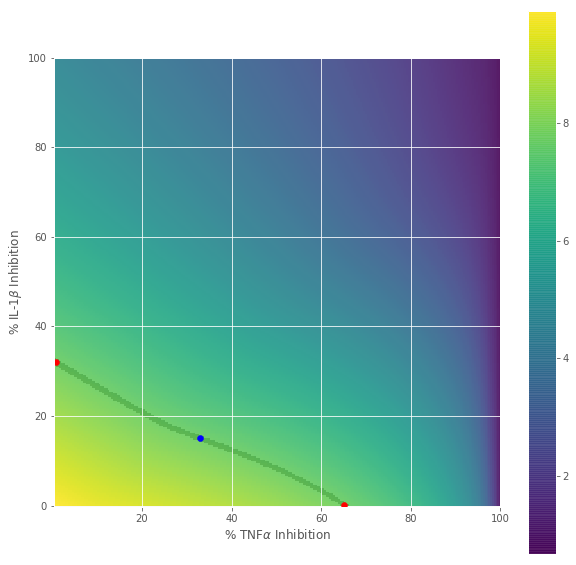

In [804]:
### Figure 10 ###
# Response surface

DETERMIND_EFFECT = 7.75
line_matrix_under = (max_inf_per_inhib > (DETERMIND_EFFECT - 0.05))
line_matrix_over = (max_inf_per_inhib < (DETERMIND_EFFECT + 0.05))
line_matrix = (line_matrix_over & line_matrix_under) * 1000

extent = [0, N-1, 0, N-1]
fig, ax1 = plt.subplots(1,1, frameon=False, figsize=(10, 10))

im1 = plt.imshow(line_matrix, cmap=plt.cm.gray_r, interpolation='none',
                 extent=extent)
im2 = plt.imshow(max_inf_per_inhib, cmap=plt.cm.viridis, alpha=0.9, interpolation='none',
                 extent=extent)
plt.colorbar()
plt.xlim(N-1, 0)
plt.ylim(-1, N)
ax1.set_xticklabels([100, 80, 60, 40, 20, 0])
ax1.set_yticklabels(['', 0, 20, 40, 60, 80, 100])
plt.xlabel(r"% TNF$\alpha$ Inhibition")
plt.ylabel(r'% IL-1$\beta$ Inhibition')
# plt.title("Maximal sum of pro-inflammatory cytokines levels \nas a function of " + r"TNF$\alpha$ and IL-1$\beta$ inhibition")

scaling_factor = N/100
plt.scatter(35*scaling_factor, 0.2*scaling_factor, c='red', marker='o')
plt.scatter(99.2*scaling_factor, 32*scaling_factor, c='red', marker='o')
plt.scatter(67*scaling_factor, 15*scaling_factor, c='blue', marker='o')


# plt.show()
plt.savefig("Combined_inhibitory_effect.png", dpi=1000, bbox_inches='tight')#, bbox_extra_artist=[lgd])

In [768]:
max_inf_per_inhib[int(85*scaling_factor)][int(67*scaling_factor)]
# max_inf_per_inhib[N-1][int(35*scaling_factor)]
# max_inf_per_inhib[int(67.9*scaling_factor)][N-1]

7.751237493243011

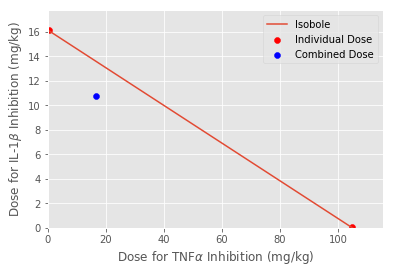

In [847]:
### Figure 12 ###
# Isobole plot

# plt.figure(figsize=(6, 3))
intercept_x = 105
intercept_y = 16.15
plt.scatter(0.2, intercept_y, c='red', marker='o', label="Individual Dose")
plt.scatter(intercept_x, 0.1, c='red', marker='o')
plt.scatter(16.6, 10.8, c='blue', marker='o', label="Combined Dose")
x = np.linspace(0, 310, 100)
y = - (intercept_y/intercept_x) * x  + intercept_y
plt.plot(x, y, label="Isobole")
# y2 = 24.8 - 5.2/((8/7) * (1 + 18/x) - 1)
# y2 = 24.8 - 15/((1 + 18/x) - 1)
# y2 = 24.8 - x * (24.8 / 310)
# plt.plot(x, y2, label="Isobole2")
plt.xlim(0, intercept_x*1.1)
plt.ylim(0, intercept_y*1.1)
plt.xlabel(r"Dose for TNF$\alpha$ Inhibition (mg/kg)")
plt.ylabel(r'Dose for IL-1$\beta$ Inhibition (mg/kg)')
plt.legend()
# plt.show()
plt.savefig("Isobole_curve.png", dpi=1000, bbox_inches='tight')#, bbox_extra_artist=[lgd])

In [831]:
# max_inf_per_inhib[int(85*scaling_factor)][int(67*scaling_factor)]
max_inf_per_inhib[N-1][int(37*scaling_factor)]
# max_inf_per_inhib[int(67.9*scaling_factor)][N-1]

7.853397232987778